# Problem

Predict if the client will subscribe (yes/no) a term deposit based on the marketing campaign.

# About the dataset

### Input variables:

#### bank client data:

age (numeric)

job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 

marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

education (categorical: "unknown","secondary","primary","tertiary")

default: has credit in default? (binary: "yes","no")

balance: average yearly balance, in euros (numeric) 

housing: has housing loan? (binary: "yes","no")

loan: has personal loan? (binary: "yes","no")

#### related with the last contact of the current campaign:

contact: contact communication type (categorical: "unknown","telephone","cellular") 

day: last contact day of the month (numeric)

month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

duration: last contact duration, in seconds (numeric)

#### other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output/Target variable:

y: has the client subscribed a term deposit? (binary: "yes","no")

# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading Data

In [2]:
raw_data = pd.read_csv('D:/AILABS/Datasets/bank_full_new.csv', sep=';', engine='python')
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Description

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
raw_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# Data Preprocessing

### Checking for missing values

In [5]:
data = raw_data.copy()

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Analyzing categorical attributes

In [7]:
data.default.unique()

array(['no', 'yes'], dtype=object)

In [8]:
data.housing.unique()

array(['yes', 'no'], dtype=object)

In [9]:
data.loan.unique()

array(['no', 'yes'], dtype=object)

In [10]:
# Label encoding binary variables

data['default'] = data['default'].replace({'yes':1,'no':0})
data['housing'] = data['housing'].replace({'yes':1,'no':0})
data['loan'] = data['loan'].replace({'yes':1,'no':0})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data.day = data.day.astype(str)

In [12]:
cat_atts = data.select_dtypes(include=['object'])
cat_atts.columns

Index(['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome',
       'y'],
      dtype='object')

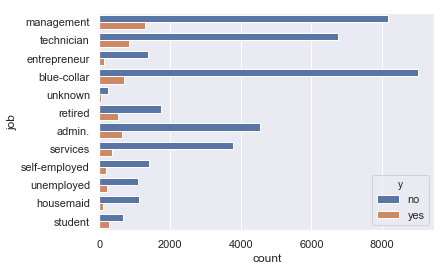

In [13]:
sns.countplot(y='job', hue='y', data = cat_atts)

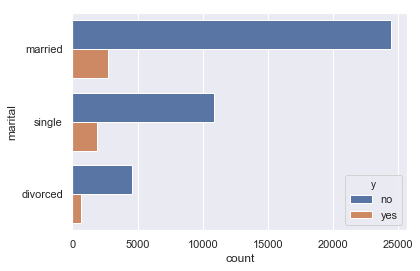

In [14]:
sns.countplot(y='marital', hue='y', data = cat_atts)

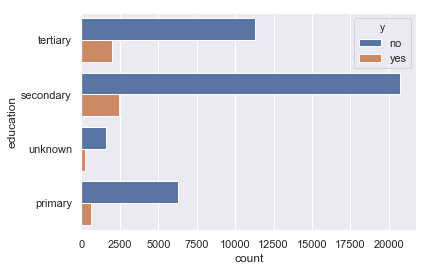

In [15]:
sns.countplot(y='education', hue='y', data = cat_atts)

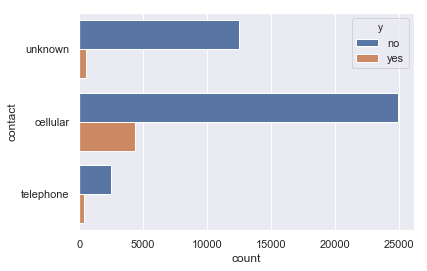

In [16]:
sns.countplot(y='contact', hue='y', data = cat_atts)

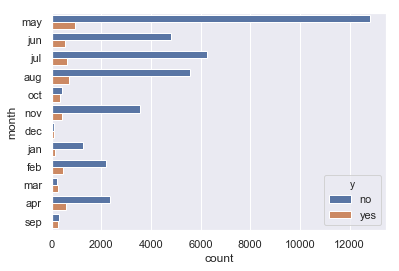

In [17]:
sns.countplot(y='month', hue='y', data = cat_atts)

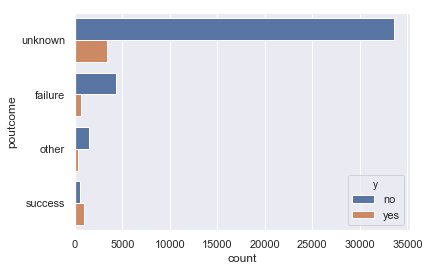

In [18]:
sns.countplot(y='poutcome', hue='y', data = cat_atts)

In [19]:
data1 = data.copy()

### Creating dummy variables

In [20]:
data_dummies = pd.get_dummies(data1[list(cat_atts.columns)[:-1]])

In [21]:
data_dummies.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_2',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_3', 'day_30', 'day_31', 'day_4',
       'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other

In [22]:
# Dropping columns for which dummy variables have been created

data1 = data1.drop(list(cat_atts.columns)[:-1], axis=1)
data1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,no
1,44,0,29,1,0,151,1,-1,0,no
2,33,0,2,1,1,76,1,-1,0,no
3,47,0,1506,1,0,92,1,-1,0,no
4,33,0,1,0,0,198,1,-1,0,no


In [23]:
data1['y'] = data1['y'].replace({'no':0,'yes':1})
data1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0


### Analyzing numerical attributes

In [24]:
data1.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [25]:
data1.groupby('y').mean()

,age,default,balance,housing,loan,duration,campaign,pdays,previous
y,,,,,,,,,
0,40.838986,0.019112,1303.714969,0.581008,0.169330,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1804.267915,0.365854,0.091511,537.294574,2.141047,68.702968,1.170354


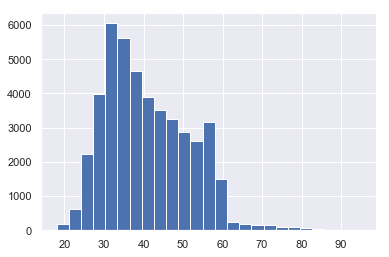

In [26]:
data1.age.hist(bins=25)

In [27]:
len(data1[data1.balance < 10000])

44382

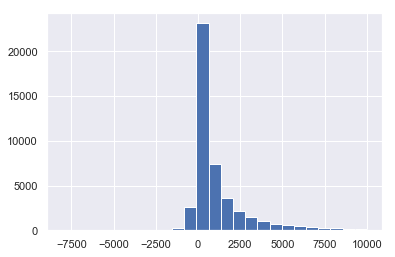

In [28]:
data1[data1.balance < 10000].balance.hist(bins=25)

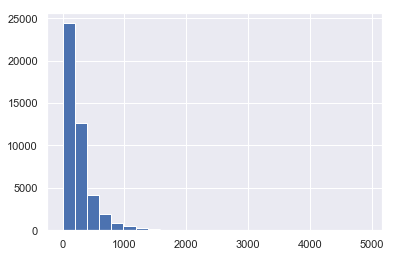

In [29]:
data1.duration.hist(bins=25)

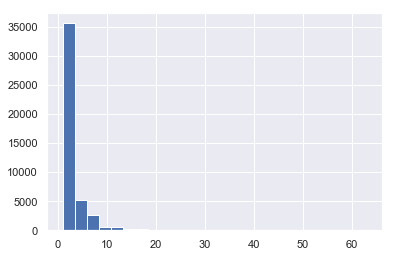

In [30]:
data1.campaign.hist(bins=25)

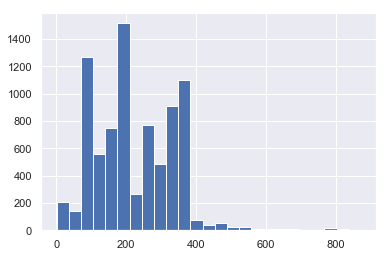

In [31]:
data1[data1.pdays != -1].pdays.hist(bins=25)

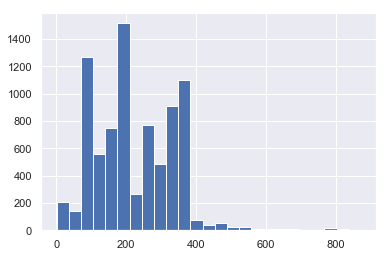

In [32]:
data1[data1.previous != 0].pdays.hist(bins=25)

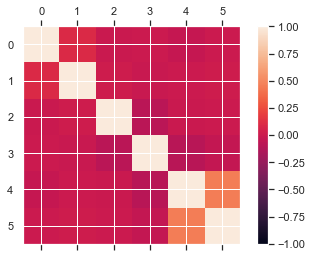

In [33]:
correlations = data1[['age','balance','duration','campaign','pdays','previous']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [34]:
correlations.iloc[4,5]

0.4548196354805041

### Scaling the numerical attributes

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[['age','balance','duration','previous','pdays']] = scaler.fit_transform(data[['age','balance','duration','previous','pdays']])
data1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,1.606965,0,0.256419,1,0,0.011016,1,-0.411453,-0.25194,0
1,0.288529,0,-0.437895,1,0,-0.416127,1,-0.411453,-0.25194,0
2,-0.747384,0,-0.446762,1,1,-0.707361,1,-0.411453,-0.25194,0
3,0.571051,0,0.047205,1,0,-0.645231,1,-0.411453,-0.25194,0
4,-0.747384,0,-0.447091,0,0,-0.233620,1,-0.411453,-0.25194,0


### Reducing no. of dummy variables

In [36]:
data_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
data_dummies.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_2',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_3', 'day_30', 'day_31', 'day_4',
       'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other

In [38]:
data_dummies_red = data_dummies

In [39]:
# Changing days of the month to days of week, assuming day 1 is a Monday

data_dummies_red['day_mon'] = data_dummies_red.day_1 + data_dummies_red.day_8 + data_dummies_red.day_15 \
                              + data_dummies_red.day_22 + data_dummies_red.day_29
data_dummies_red['day_tue'] = data_dummies_red.day_2 + data_dummies_red.day_9 + data_dummies_red.day_16 \
                              + data_dummies_red.day_23 + data_dummies_red.day_30
data_dummies_red['day_wed'] = data_dummies_red.day_3 + data_dummies_red.day_10 + data_dummies_red.day_17 \
                              + data_dummies_red.day_24 + data_dummies_red.day_31
data_dummies_red['day_thu'] = data_dummies_red.day_4 + data_dummies_red.day_11 + data_dummies_red.day_18 \
                              + data_dummies_red.day_25
data_dummies_red['day_fri'] = data_dummies_red.day_5 + data_dummies_red.day_12 + data_dummies_red.day_19 \
                              + data_dummies_red.day_26
data_dummies_red['day_sat'] = data_dummies_red.day_6 + data_dummies_red.day_13 + data_dummies_red.day_20 \
                              + data_dummies_red.day_27
data_dummies_red['day_sun'] = data_dummies_red.day_7 + data_dummies_red.day_14 + data_dummies_red.day_21 \
                              + data_dummies_red.day_28

In [40]:
# Grouping months into quarters

data_dummies_red['q1'] = data_dummies_red.month_jan + data_dummies_red.month_feb + data_dummies_red.month_mar
data_dummies_red['q2'] = data_dummies_red.month_apr + data_dummies_red.month_may + data_dummies_red.month_jun
data_dummies_red['q3'] = data_dummies_red.month_jul + data_dummies_red.month_aug + data_dummies_red.month_sep
data_dummies_red['q4'] = data_dummies_red.month_oct + data_dummies_red.month_nov + data_dummies_red.month_dec

In [41]:
# Grouping the jobs together based on similar characteristics

data_dummies_red['job_group1'] = data_dummies_red['job_management'] + data_dummies_red['job_blue-collar'] \
                                 + data_dummies_red['job_entrepreneur']
data_dummies_red['job_group2'] = data_dummies_red['job_admin.'] + data_dummies_red['job_services'] \
                                 + data_dummies_red['job_technician']
data_dummies_red['job_group3'] = data_dummies_red['job_housemaid'] + data_dummies_red['job_self-employed']
data_dummies_red['job_group4'] = data_dummies_red['job_retired'] + data_dummies_red['job_student'] \
                                 + data_dummies_red['job_unemployed']
data_dummies_red['job_group5'] = data_dummies_red['job_unknown']

In [42]:
data_dummies_red.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_2',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_3', 'day_30', 'day_31', 'day_4',
       'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other

In [43]:
l2 = []
for i in range(31):
    l2.append('day_'+str(i+1))

l2 = l2 + ['month_jan','month_feb','month_mar','month_apr','month_may','month_jun', \
           'month_jul','month_aug','month_sep','month_oct','month_nov','month_dec']

l2 = l2 + ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', \
           'job_management', 'job_retired', 'job_self-employed', 'job_services', \
           'job_student', 'job_technician', 'job_unemployed', 'job_unknown',]

In [44]:
data_dummies_red = data_dummies_red.drop(l2, axis=1)

In [45]:
data_dummies_red.columns

Index(['marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'day_mon', 'day_tue', 'day_wed',
       'day_thu', 'day_fri', 'day_sat', 'day_sun', 'q1', 'q2', 'q3', 'q4',
       'job_group1', 'job_group2', 'job_group3', 'job_group4', 'job_group5'],
      dtype='object')

In [46]:
data_dummies_red.head()

,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,...,day_sun,q1,q2,q3,q4,job_group1,job_group2,job_group3,job_group4,job_group5
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Joining the numerical and categorical attributes

In [47]:
data_final = pd.concat([data1,data_dummies_red], axis=1)
data_final.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,day_sun,q1,q2,q3,q4,job_group1,job_group2,job_group3,job_group4,job_group5
0,1.606965,0,0.256419,1,0,0.011016,1,-0.411453,-0.25194,0,...,0,0,1,0,0,1,0,0,0,0
1,0.288529,0,-0.437895,1,0,-0.416127,1,-0.411453,-0.25194,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.747384,0,-0.446762,1,1,-0.707361,1,-0.411453,-0.25194,0,...,0,0,1,0,0,1,0,0,0,0
3,0.571051,0,0.047205,1,0,-0.645231,1,-0.411453,-0.25194,0,...,0,0,1,0,0,1,0,0,0,0
4,-0.747384,0,-0.447091,0,0,-0.233620,1,-0.411453,-0.25194,0,...,0,0,1,0,0,0,0,0,0,1


### Checking for imbalanced dataset

In [48]:
data_final.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

### Splitting the train and test sets

In [49]:
X = data_final.drop('y', axis=1)
y = data_final['y']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_valandtest, y_train, y_valandtest = train_test_split(X, y, test_size=0.2, random_state=10)

In [51]:
print(X_train.shape, y_train.shape)

(36168, 39) (36168,)


In [52]:
X_val, X_test, y_val, y_test = train_test_split(X_valandtest, y_valandtest, test_size=0.5, random_state=11)
print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

(4521, 39) (4522, 39) (4521,) (4522,)


In [53]:
print(y_train.value_counts(),'\n',y_val.value_counts(),'\n',y_test.value_counts())

0    31928
1     4240
Name: y, dtype: int64 
 0    3981
1     540
Name: y, dtype: int64 
 0    4013
1     509
Name: y, dtype: int64


### Balancing the train set

In [54]:
import imblearn
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=12)
X_train_balanced, y_train_balanced = adasyn.fit_sample(X_train,y_train)

In [55]:
print(X_train_balanced.shape, y_train_balanced.shape)

(62918, 39) (62918,)


In [56]:
np.bincount(y_train_balanced)

array([31928, 30990], dtype=int64)

# Data Modelling: Multi-layered Perceptron

In [57]:
import tensorflow as tf

input_size = X_train_balanced.shape[1]
hidden_layer_size = [100, 50, 20]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[0]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[0]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[0]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 2s - loss: 0.5803 - acc: 0.6992 - val_loss: 0.5369 - val_acc: 0.7180
Epoch 2/100
 - 2s - loss: 0.5375 - acc: 0.7358 - val_loss: 0.5072 - val_acc: 0.7562
Epoch 3/100
 - 2s - loss: 0.4883 - acc: 0.7683 - val_loss: 0.4251 - val_acc: 0.8140
Epoch 4/100
 - 2s - loss: 0.4272 - acc: 0.8060 - val_loss: 0.5934 - val_acc: 0.6881
Epoch 5/100
 - 2s - loss: 0.3760 - acc: 0.8334 - val_loss: 0.3349 - val_acc: 0.8679
Epoch 6/100
 - 2s - loss: 0.3377 - acc: 0.8538 - val_loss: 0.3374 - val_acc: 0.8549
Epoch 7/100
 - 2s - loss: 0.3102 - acc: 0.8679 - val_loss: 0.3445 - val_acc: 0.8576
Epoch 8/100
 - 2s - loss: 0.2857 - acc: 0.8798 - val_loss: 0.3098 - val_acc: 0.8764
Epoch 9/100
 - 2s - loss: 0.2680 - acc: 0.8884 - val_loss: 0.3531 - val_acc: 0.8549
Epoch 10/100
 - 2s - loss: 0.2561 - acc: 0.8932 - val_loss: 0.3253 - val_acc: 0.8682
Epoch 11/100
 - 2s - loss: 0.2447 - acc: 0.8973 - val_loss: 0.2985 - val_acc: 0.8792
Epoch 12/100
 - 2s - loss

In [58]:
y_pred = model.predict_classes(X_val)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3583  222]
 [ 398  318]] 

              precision    recall  f1-score   support

          0       0.90      0.94      0.92      3805
          1       0.59      0.44      0.51       716

avg / total       0.85      0.86      0.85      4521
 
 Area under ROC curve:  0.692894897187617


In [59]:
import tensorflow as tf

input_size = X_train_balanced.shape[1]
hidden_layer_size = [100, 50, 20]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[1]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 2s - loss: 0.4915 - acc: 0.7646 - val_loss: 0.4525 - val_acc: 0.7992
Epoch 2/100
 - 2s - loss: 0.3795 - acc: 0.8241 - val_loss: 0.3538 - val_acc: 0.8538
Epoch 3/100
 - 2s - loss: 0.3279 - acc: 0.8523 - val_loss: 0.3558 - val_acc: 0.8441
Epoch 4/100
 - 2s - loss: 0.3055 - acc: 0.8635 - val_loss: 0.2712 - val_acc: 0.8887
Epoch 5/100
 - 2s - loss: 0.2882 - acc: 0.8714 - val_loss: 0.4040 - val_acc: 0.8118
Epoch 6/100
 - 2s - loss: 0.2757 - acc: 0.8764 - val_loss: 0.2647 - val_acc: 0.8885
Epoch 7/100
 - 2s - loss: 0.2619 - acc: 0.8850 - val_loss: 0.2849 - val_acc: 0.8865
Epoch 8/100
 - 2s - loss: 0.2522 - acc: 0.8893 - val_loss: 0.2991 - val_acc: 0.8644
Epoch 9/100
 - 2s - loss: 0.2406 - acc: 0.8963 - val_loss: 0.3292 - val_acc: 0.8511
Epoch 10/100
 - 2s - loss: 0.2331 - acc: 0.8979 - val_loss: 0.2649 - val_acc: 0.8936
Epoch 11/100
 - 2s - loss: 0.2233 - acc: 0.9035 - val_loss: 0.2830 - val_acc: 0.8828
Epoch 12/100
 - 2s - loss

In [60]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3734  282]
 [ 247  258]] 

              precision    recall  f1-score   support

          0       0.94      0.93      0.93      4016
          1       0.48      0.51      0.49       505

avg / total       0.89      0.88      0.88      4521
 
 Area under ROC curve:  0.7203359828014674


In [61]:
import tensorflow as tf

input_size = X_train_balanced.shape[1]
hidden_layer_size = [100, 50, 20]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[2]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[2]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 3s - loss: 0.4066 - acc: 0.8141 - val_loss: 0.2853 - val_acc: 0.8779
Epoch 2/100
 - 2s - loss: 0.2876 - acc: 0.8755 - val_loss: 0.2805 - val_acc: 0.8817
Epoch 3/100
 - 2s - loss: 0.2533 - acc: 0.8918 - val_loss: 0.3033 - val_acc: 0.8761
Epoch 4/100
 - 2s - loss: 0.2339 - acc: 0.8999 - val_loss: 0.2554 - val_acc: 0.8936
Epoch 5/100
 - 2s - loss: 0.2198 - acc: 0.9062 - val_loss: 0.2795 - val_acc: 0.8797
Epoch 6/100
 - 2s - loss: 0.2091 - acc: 0.9104 - val_loss: 0.2367 - val_acc: 0.8967
Epoch 7/100
 - 2s - loss: 0.2013 - acc: 0.9139 - val_loss: 0.2701 - val_acc: 0.8876
Epoch 8/100
 - 2s - loss: 0.1936 - acc: 0.9176 - val_loss: 0.2577 - val_acc: 0.8921
Epoch 9/100
 - 2s - loss: 0.1855 - acc: 0.9208 - val_loss: 0.2323 - val_acc: 0.9025
Epoch 10/100
 - 2s - loss: 0.1826 - acc: 0.9225 - val_loss: 0.2452 - val_acc: 0.8971
Epoch 11/100
 - 2s - loss: 0.1768 - acc: 0.9236 - val_loss: 0.2935 - val_acc: 0.8848
Epoch 12/100
 - 2s - loss

In [62]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3753  307]
 [ 228  233]] 

              precision    recall  f1-score   support

          0       0.94      0.92      0.93      4060
          1       0.43      0.51      0.47       461

avg / total       0.89      0.88      0.89      4521
 
 Area under ROC curve:  0.714903614972805


In [64]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [25,15,8]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 2s - loss: 0.5287 - acc: 0.7413 - val_loss: 0.4512 - val_acc: 0.7972
Epoch 2/100
 - 3s - loss: 0.4453 - acc: 0.7993 - val_loss: 0.3556 - val_acc: 0.8542
Epoch 3/100
 - 2s - loss: 0.3848 - acc: 0.8320 - val_loss: 0.3224 - val_acc: 0.8620
Epoch 4/100
 - 2s - loss: 0.3472 - acc: 0.8487 - val_loss: 0.3611 - val_acc: 0.8480
Epoch 5/100
 - 2s - loss: 0.3247 - acc: 0.8579 - val_loss: 0.2819 - val_acc: 0.8879
Epoch 6/100
 - 2s - loss: 0.3107 - acc: 0.8636 - val_loss: 0.3040 - val_acc: 0.8755
Epoch 7/100
 - 2s - loss: 0.2974 - acc: 0.8707 - val_loss: 0.3445 - val_acc: 0.8578
Epoch 8/100
 - 2s - loss: 0.2885 - acc: 0.8732 - val_loss: 0.2970 - val_acc: 0.8764
Epoch 9/100
 - 2s - loss: 0.2800 - acc: 0.8773 - val_loss: 0.3230 - val_acc: 0.8635
Epoch 10/100
 - 2s - loss: 0.2716 - acc: 0.8824 - val_loss: 0.4315 - val_acc: 0.8012
Epoch 11/100
 - 2s - loss: 0.2651 - acc: 0.8850 - val_loss: 0.2960 - val_acc: 0.8764
Epoch 12/100
 - 2s - loss

In [65]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3767  277]
 [ 214  263]] 

              precision    recall  f1-score   support

          0       0.95      0.93      0.94      4044
          1       0.49      0.55      0.52       477

avg / total       0.90      0.89      0.89      4521
 
 Area under ROC curve:  0.7414330726785237


In [66]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [25,15,8]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ear_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, callbacks=[ear_stop], verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 2s - loss: 0.5190 - acc: 0.7476 - val_loss: 0.5062 - val_acc: 0.7605
Epoch 2/100
 - 2s - loss: 0.4277 - acc: 0.8044 - val_loss: 0.4176 - val_acc: 0.8171
Epoch 3/100
 - 2s - loss: 0.3685 - acc: 0.8338 - val_loss: 0.3280 - val_acc: 0.8573
Epoch 4/100
 - 2s - loss: 0.3343 - acc: 0.8517 - val_loss: 0.3005 - val_acc: 0.8810
Epoch 5/100
 - 2s - loss: 0.3123 - acc: 0.8627 - val_loss: 0.3148 - val_acc: 0.8739
Epoch 6/100
 - 2s - loss: 0.2983 - acc: 0.8687 - val_loss: 0.2938 - val_acc: 0.8859
Epoch 7/100
 - 2s - loss: 0.2882 - acc: 0.8739 - val_loss: 0.3173 - val_acc: 0.8730
Epoch 8/100
 - 2s - loss: 0.2804 - acc: 0.8772 - val_loss: 0.3348 - val_acc: 0.8558
Epoch 9/100
 - 2s - loss: 0.2693 - acc: 0.8843 - val_loss: 0.2704 - val_acc: 0.8881
Epoch 10/100
 - 2s - loss: 0.2583 - acc: 0.8890 - val_loss: 0.3298 - val_acc: 0.8642
Epoch 11/100
 - 2s - loss: 0.2492 - acc: 0.8925 - val_loss: 0.2851 - val_acc: 0.8792
Epoch 12/100
 - 2s - loss

In [67]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3685  234]
 [ 296  306]] 

              precision    recall  f1-score   support

          0       0.93      0.94      0.93      3919
          1       0.57      0.51      0.54       602

avg / total       0.88      0.88      0.88      4521
 
 Area under ROC curve:  0.7242982691869154


In [68]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [25,15,8]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ear_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, callbacks=[ear_stop], verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 2s - loss: 0.5317 - acc: 0.7361 - val_loss: 0.4882 - val_acc: 0.7682
Epoch 2/100
 - 2s - loss: 0.4399 - acc: 0.7989 - val_loss: 0.4351 - val_acc: 0.8142
Epoch 3/100
 - 2s - loss: 0.3689 - acc: 0.8346 - val_loss: 0.3228 - val_acc: 0.8666
Epoch 4/100
 - 2s - loss: 0.3394 - acc: 0.8464 - val_loss: 0.3629 - val_acc: 0.8485
Epoch 5/100
 - 2s - loss: 0.3229 - acc: 0.8565 - val_loss: 0.3465 - val_acc: 0.8525
Epoch 6/100
 - 2s - loss: 0.3118 - acc: 0.8604 - val_loss: 0.3247 - val_acc: 0.8730
Epoch 7/100
 - 2s - loss: 0.3025 - acc: 0.8655 - val_loss: 0.3071 - val_acc: 0.8746
Epoch 8/100
 - 2s - loss: 0.2937 - acc: 0.8701 - val_loss: 0.3354 - val_acc: 0.8560
Epoch 9/100
 - 2s - loss: 0.2833 - acc: 0.8745 - val_loss: 0.3121 - val_acc: 0.8702
Epoch 10/100
 - 2s - loss: 0.2755 - acc: 0.8801 - val_loss: 0.3055 - val_acc: 0.8708
Epoch 11/100
 - 2s - loss: 0.2654 - acc: 0.8847 - val_loss: 0.3233 - val_acc: 0.8675
Epoch 12/100
 - 2s - loss

In [69]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3545  168]
 [ 436  372]] 

              precision    recall  f1-score   support

          0       0.89      0.95      0.92      3713
          1       0.69      0.46      0.55       808

avg / total       0.85      0.87      0.86      4521
 
 Area under ROC curve:  0.7075748040734587


In [70]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [25,15,8]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ear_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, callbacks=[ear_stop], verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 3s - loss: 0.5207 - acc: 0.7465 - val_loss: 0.3742 - val_acc: 0.8445
Epoch 2/100
 - 2s - loss: 0.4166 - acc: 0.8107 - val_loss: 0.3986 - val_acc: 0.8171
Epoch 3/100
 - 2s - loss: 0.3649 - acc: 0.8371 - val_loss: 0.3759 - val_acc: 0.8388
Epoch 4/100
 - 2s - loss: 0.3329 - acc: 0.8519 - val_loss: 0.3139 - val_acc: 0.8750
Epoch 5/100
 - 2s - loss: 0.3126 - acc: 0.8607 - val_loss: 0.3219 - val_acc: 0.8624
Epoch 6/100
 - 2s - loss: 0.3010 - acc: 0.8655 - val_loss: 0.2814 - val_acc: 0.8905
Epoch 7/100
 - 2s - loss: 0.2914 - acc: 0.8692 - val_loss: 0.4474 - val_acc: 0.7927
Epoch 8/100
 - 2s - loss: 0.2831 - acc: 0.8740 - val_loss: 0.3346 - val_acc: 0.8604
Epoch 9/100
 - 2s - loss: 0.2764 - acc: 0.8773 - val_loss: 0.2992 - val_acc: 0.8708
Epoch 10/100
 - 2s - loss: 0.2700 - acc: 0.8802 - val_loss: 0.2845 - val_acc: 0.8812
Epoch 11/100
 - 2s - loss: 0.2666 - acc: 0.8823 - val_loss: 0.2916 - val_acc: 0.8817
Epoch 12/100
 - 2s - loss

In [71]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3824  314]
 [ 157  226]] 

              precision    recall  f1-score   support

          0       0.96      0.92      0.94      4138
          1       0.42      0.59      0.49       383

avg / total       0.91      0.90      0.90      4521
 
 Area under ROC curve:  0.7570981301747669


In [72]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [100,50,20]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ear_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, callbacks=[ear_stop], verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 3s - loss: 0.4639 - acc: 0.7835 - val_loss: 0.4949 - val_acc: 0.7781
Epoch 2/100
 - 2s - loss: 0.3559 - acc: 0.8414 - val_loss: 0.3887 - val_acc: 0.8399
Epoch 3/100
 - 2s - loss: 0.3170 - acc: 0.8600 - val_loss: 0.2997 - val_acc: 0.8695
Epoch 4/100
 - 2s - loss: 0.2976 - acc: 0.8692 - val_loss: 0.3377 - val_acc: 0.8527
Epoch 5/100
 - 2s - loss: 0.2822 - acc: 0.8755 - val_loss: 0.3100 - val_acc: 0.8682
Epoch 6/100
 - 2s - loss: 0.2725 - acc: 0.8800 - val_loss: 0.3685 - val_acc: 0.8341
Epoch 7/100
 - 2s - loss: 0.2639 - acc: 0.8843 - val_loss: 0.2572 - val_acc: 0.8894
Epoch 8/100
 - 2s - loss: 0.2524 - acc: 0.8899 - val_loss: 0.3358 - val_acc: 0.8613
Epoch 9/100
 - 2s - loss: 0.2448 - acc: 0.8941 - val_loss: 0.2512 - val_acc: 0.8921
Epoch 10/100
 - 2s - loss: 0.2349 - acc: 0.8984 - val_loss: 0.2739 - val_acc: 0.8788
Epoch 11/100
 - 2s - loss: 0.2264 - acc: 0.9024 - val_loss: 0.3509 - val_acc: 0.8337
Epoch 12/100
 - 2s - loss

In [73]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3822  297]
 [ 159  243]] 

              precision    recall  f1-score   support

          0       0.96      0.93      0.94      4119
          1       0.45      0.60      0.52       402

avg / total       0.91      0.90      0.91      4521
 
 Area under ROC curve:  0.7661863660575492


In [74]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [100,50,20]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ear_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, callbacks=[ear_stop], verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 3s - loss: 0.4832 - acc: 0.7687 - val_loss: 0.3737 - val_acc: 0.8372
Epoch 2/100
 - 2s - loss: 0.3724 - acc: 0.8309 - val_loss: 0.4321 - val_acc: 0.8177
Epoch 3/100
 - 2s - loss: 0.3243 - acc: 0.8563 - val_loss: 0.2722 - val_acc: 0.8872
Epoch 4/100
 - 2s - loss: 0.2986 - acc: 0.8679 - val_loss: 0.3052 - val_acc: 0.8708
Epoch 5/100
 - 2s - loss: 0.2809 - acc: 0.8778 - val_loss: 0.3080 - val_acc: 0.8739
Epoch 6/100
 - 3s - loss: 0.2645 - acc: 0.8860 - val_loss: 0.2930 - val_acc: 0.8735
Epoch 7/100
 - 2s - loss: 0.2554 - acc: 0.8897 - val_loss: 0.2875 - val_acc: 0.8814
Epoch 8/100
 - 2s - loss: 0.2441 - acc: 0.8952 - val_loss: 0.3474 - val_acc: 0.8518
Epoch 9/100
 - 2s - loss: 0.2357 - acc: 0.8994 - val_loss: 0.2703 - val_acc: 0.8898
Epoch 10/100
 - 3s - loss: 0.2295 - acc: 0.9024 - val_loss: 0.2800 - val_acc: 0.8845
Epoch 11/100
 - 2s - loss: 0.2222 - acc: 0.9050 - val_loss: 0.2810 - val_acc: 0.8892
Epoch 12/100
 - 2s - loss

In [75]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3781  293]
 [ 200  247]] 

              precision    recall  f1-score   support

          0       0.95      0.93      0.94      4074
          1       0.46      0.55      0.50       447

avg / total       0.90      0.89      0.90      4521
 
 Area under ROC curve:  0.7403266087449302


In [80]:
input_size = X_train_balanced.shape[1]
hidden_layer_size = [100,50,20]
output_size = 2

act_funcs = ['sigmoid','tanh','relu']

model = tf.keras.Sequential([
        
    tf.keras.layers.Dense(hidden_layer_size[0], activation=act_funcs[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_layer_size[1], activation=act_funcs[1]),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(hidden_layer_size[2], activation=act_funcs[2]),

    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ear_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val,y_val), epochs=100, callbacks=[ear_stop], verbose=2)

Train on 62918 samples, validate on 4521 samples
Epoch 1/100
 - 4s - loss: 0.5049 - acc: 0.7573 - val_loss: 0.4179 - val_acc: 0.8233
Epoch 2/100
 - 3s - loss: 0.4309 - acc: 0.8043 - val_loss: 0.3105 - val_acc: 0.8719
Epoch 3/100
 - 3s - loss: 0.3921 - acc: 0.8240 - val_loss: 0.4984 - val_acc: 0.7722
Epoch 4/100
 - 3s - loss: 0.3614 - acc: 0.8373 - val_loss: 0.3218 - val_acc: 0.8567
Epoch 5/100
 - 3s - loss: 0.3380 - acc: 0.8479 - val_loss: 0.3458 - val_acc: 0.8447
Epoch 6/100
 - 3s - loss: 0.3216 - acc: 0.8552 - val_loss: 0.2499 - val_acc: 0.8969
Epoch 7/100
 - 3s - loss: 0.3051 - acc: 0.8639 - val_loss: 0.2869 - val_acc: 0.8814
Epoch 8/100
 - 3s - loss: 0.2888 - acc: 0.8743 - val_loss: 0.2429 - val_acc: 0.9016
Epoch 9/100
 - 3s - loss: 0.2773 - acc: 0.8794 - val_loss: 0.2858 - val_acc: 0.8768
Epoch 10/100
 - 2s - loss: 0.2668 - acc: 0.8831 - val_loss: 0.2875 - val_acc: 0.8783
Epoch 11/100
 - 3s - loss: 0.2600 - acc: 0.8868 - val_loss: 0.2838 - val_acc: 0.8830
Epoch 12/100
 - 2s - loss

In [81]:
y_pred = model.predict_classes(X_val)

cnf_mt = confusion_matrix(y_pred, y_val)
roc_auc = roc_auc_score(y_pred, y_val)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred,y_val),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3850  332]
 [ 131  208]] 

              precision    recall  f1-score   support

          0       0.97      0.92      0.94      4182
          1       0.39      0.61      0.47       339

avg / total       0.92      0.90      0.91      4521
 
 Area under ROC curve:  0.7670907344159335


In [82]:
y_pred_test = model.predict_classes(X_test)

cnf_mt = confusion_matrix(y_pred_test, y_test)
roc_auc = roc_auc_score(y_pred_test, y_test)
print('Confusion Matrix:\n',cnf_mt,'\n\n',classification_report(y_pred_test,y_test),'\n','Area under ROC curve: ',roc_auc)

Confusion Matrix:
 [[3863  307]
 [ 150  202]] 

              precision    recall  f1-score   support

          0       0.96      0.93      0.94      4170
          1       0.40      0.57      0.47       352

avg / total       0.92      0.90      0.91      4522
 
 Area under ROC curve:  0.7501212666230651
